<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Work" data-toc-modified-id="Work-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Work</a></span><ul class="toc-item"><li><span><a href="#Creating-dls-with-only-Torch-and-PIL" data-toc-modified-id="Creating-dls-with-only-Torch-and-PIL-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating <code>dls</code> with only Torch and PIL</a></span></li><li><span><a href="#Converting-the-above-to-fastai's-mid-level-API-with-Transform" data-toc-modified-id="Converting-the-above-to-fastai's-mid-level-API-with-Transform-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Converting the above to fastai's mid-level API with <code>Transform</code></a></span></li><li><span><a href="#Making-show-work-with-a-simple-class" data-toc-modified-id="Making-show-work-with-a-simple-class-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Making <code>show</code> work with a simple class</a></span></li><li><span><a href="#Making-show_batch()-work-by-utilizing-SiameseImage" data-toc-modified-id="Making-show_batch()-work-by-utilizing-SiameseImage-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Making <code>show_batch()</code> work by utilizing SiameseImage</a></span></li><li><span><a href="#Detour:-creating-a-DataBlock-for-transform-code-reuse-on-any-tuple-of-ims" data-toc-modified-id="Detour:-creating-a-DataBlock-for-transform-code-reuse-on-any-tuple-of-ims-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Detour: creating a <code>DataBlock</code> for transform code reuse on any tuple of ims</a></span></li><li><span><a href="#Building-the-model-with-data-from-mid-level-api-(Transforms-&amp;-TfmdLists)" data-toc-modified-id="Building-the-model-with-data-from-mid-level-api-(Transforms-&amp;-TfmdLists)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Building the model with data from mid-level api (Transforms &amp; TfmdLists)</a></span></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Modifying-show_results()-and-siam_predict()-to-use-SiameseImage's-show" data-toc-modified-id="Modifying-show_results()-and-siam_predict()-to-use-SiameseImage's-show-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Modifying <code>show_results()</code> and <code>siam_predict()</code> to use SiameseImage's show</a></span></li><li><span><a href="#Showing-predictions" data-toc-modified-id="Showing-predictions-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Showing predictions</a></span></li></ul></li><li><span><a href="#Cleaned-up" data-toc-modified-id="Cleaned-up-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaned up</a></span></li></ul></div>

# Work
> https://docs.fast.ai/tutorial.siamese

## Creating `dls` with only Torch and PIL
> `open_image()`, `label_func()`, `lbl2files[]`, `SiameseDataset`, `DataLoaders`

In [ ]:
from fastai.data.external import untar_data,URLs
from fastai.data.transforms import get_image_files
from fastcore.foundation import *

In [ ]:
path = untar_data(URLs.PETS)
files = get_image_files(path/"images")
files[0]

Path('/home/rory/.fastai/data/oxford-iiit-pet/images/japanese_chin_60.jpg')

In [ ]:
import PIL

(263, 380)


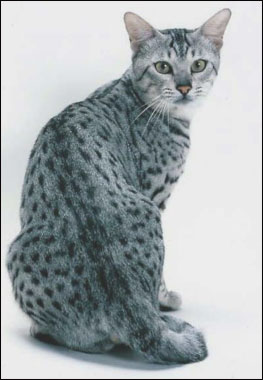

In [ ]:
im = PIL.Image.open(files[2])
print(im.size)
im

In [ ]:
import torch
import numpy as np

In [ ]:
def open_image(fname, size=224):
    im = PIL.Image.open(fname).convert('RGB')
    im = im.resize((size, size))
    t = torch.Tensor(np.array(im))
    return t.permute(2,0,1).float()/255.0

In [ ]:
print(open_image(files[2]).shape)
open_image(files[2])

torch.Size([3, 224, 224])


tensor([[[0.0941, 0.4078, 0.4078,  ..., 0.3922, 0.4078, 0.0941],
         [0.1490, 0.9765, 0.9608,  ..., 0.9569, 0.9490, 0.1529],
         [0.1490, 0.9255, 0.9255,  ..., 0.9098, 0.9255, 0.1529],
         ...,
         [0.1451, 0.9333, 0.9176,  ..., 0.9216, 0.9294, 0.1451],
         [0.1490, 0.9647, 0.9529,  ..., 0.9569, 0.9686, 0.1451],
         [0.0902, 0.4118, 0.4039,  ..., 0.4000, 0.4078, 0.0941]],

        [[0.0863, 0.4000, 0.4000,  ..., 0.3843, 0.4000, 0.0863],
         [0.1412, 0.9686, 0.9529,  ..., 0.9490, 0.9412, 0.1451],
         [0.1412, 0.9176, 0.9176,  ..., 0.9020, 0.9176, 0.1451],
         ...,
         [0.1412, 0.9294, 0.9176,  ..., 0.9176, 0.9294, 0.1451],
         [0.1412, 0.9569, 0.9451,  ..., 0.9451, 0.9569, 0.1373],
         [0.0824, 0.4039, 0.3961,  ..., 0.3922, 0.4000, 0.0863]],

        [[0.0902, 0.4039, 0.4039,  ..., 0.3882, 0.4039, 0.0902],
         [0.1451, 0.9725, 0.9569,  ..., 0.9529, 0.9490, 0.1490],
         [0.1451, 0.9216, 0.9216,  ..., 0.9137, 0.9294, 0.

In [ ]:
import re

In [ ]:
def label_func(fname): return re.match(r'^(.*)_\d+.jpg$', fname.name).groups()[0]

label_func(files[2])

'Egyptian_Mau'

In [ ]:
labels = L(set(files.map(label_func)))
len(labels)

37

In [ ]:
labels

(#37) ['english_cocker_spaniel','shiba_inu','Russian_Blue','english_setter','Persian','British_Shorthair','keeshond','samoyed','pug','Egyptian_Mau'...]

Helper function for passing in a class and getting back files of that class.

In [ ]:
lbl2files = {l: [f for f in files if label_func(f) == l] for l in labels}
lbl2files['Egyptian_Mau'][0:3]

[Path('/home/rory/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_90.jpg'),
 Path('/home/rory/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_84.jpg'),
 Path('/home/rory/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_187.jpg')]

In [ ]:
import random

In [ ]:
random.randrange(len(files))

0

In [ ]:
random.randrange(len(files))

1

Create dataset class

In [ ]:
class SiameseDataset(torch.utils.data.Dataset): # inherits from torch's Dataset
    def __init__(self, files, is_valid=False):  # init w/ list of files; is_valid=True if init'ing valid ds
        self.files, self.is_valid = files, is_valid
        if is_valid: self.files2 = [self._draw(f) for f in files] # fix validation set
        
    def __getitem__(self, i): # outputs (x1,x2,y). x2s are fixed for valid (see above) but not for train.
        file1 = self.files[i]
        (file2,same) = self.files2[i] if self.is_valid else self._draw(file1) 
        im1, im2 = open_image(file1), open_image(file2)
        return (im1, im2, torch.Tensor([same]).squeeze())
    
    def __len__(self): return len(self.files)
    
    def _draw(self, f):
        cls = label_func(f)
        same = random.random() < 0.5 # flip a coin: if True, file2 will be of same class as file1
        if not same: cls = random.choice([l for l in labels if l != cls]) # if not same, choose new cls
        return random.choice(lbl2files[cls]),same

Split train and valid

In [ ]:
random.choice([l for l in labels if l != 'Egyptian_Mau'])

'Ragdoll'

In [ ]:
ds = SiameseDataset(lbl2files['Egyptian_Mau'][0:3])

In [ ]:
ds[1]

(tensor([[[0.5882, 0.6039, 0.6824,  ..., 0.6157, 0.6157, 0.6118],
          [0.6157, 0.6196, 0.6627,  ..., 0.6118, 0.6118, 0.6118],
          [0.6667, 0.6627, 0.6706,  ..., 0.6078, 0.6078, 0.6078],
          ...,
          [0.5020, 0.5137, 0.5373,  ..., 0.5059, 0.5059, 0.5059],
          [0.5451, 0.5451, 0.5529,  ..., 0.5059, 0.5098, 0.5098],
          [0.5020, 0.4863, 0.4588,  ..., 0.5098, 0.5098, 0.5098]],
 
         [[0.6863, 0.6980, 0.7686,  ..., 0.5765, 0.5804, 0.5804],
          [0.7137, 0.7216, 0.7608,  ..., 0.5725, 0.5804, 0.5804],
          [0.7569, 0.7569, 0.7686,  ..., 0.5765, 0.5765, 0.5765],
          ...,
          [0.4745, 0.4863, 0.5137,  ..., 0.4863, 0.4863, 0.4863],
          [0.5137, 0.5098, 0.5176,  ..., 0.4863, 0.4863, 0.4902],
          [0.4627, 0.4471, 0.4196,  ..., 0.4863, 0.4863, 0.4863]],
 
         [[0.7059, 0.7059, 0.7608,  ..., 0.5294, 0.5294, 0.5294],
          [0.7294, 0.7216, 0.7490,  ..., 0.5255, 0.5294, 0.5294],
          [0.7922, 0.7804, 0.7804,  ...,

In [ ]:
idxs = np.random.permutation(range(len(files)))
cut = int(0.8 * len(files))
train_files = files[idxs[:cut]]
valid_files = files[idxs[cut:]]

In [ ]:
train_ds = SiameseDataset(train_files)
valid_ds = SiameseDataset(valid_files, is_valid=True)

In [ ]:
from fastai.data.core import DataLoaders

In [ ]:
dls = DataLoaders.from_dsets(train_ds,valid_ds)

In [ ]:
x1,x2,y = dls.one_batch()
x1.shape,x2.shape,y.shape

(torch.Size([64, 3, 224, 224]),
 torch.Size([64, 3, 224, 224]),
 torch.Size([64]))

In [ ]:
y

tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
        0., 0., 1., 1., 1., 1., 0., 1., 1., 1.])

With minimal changes to the code we wrote, we can access all of fastai's transforms and augmentations. That's next.

## Converting the above to fastai's mid-level API with `Transform`
> `SiameseTransform`, `TfmdLists`

When I have a custom dataset class, I can easily convert it into a fastai Transform by just changing the `__getitem__` to `encodes` and setting the class to inherit from `Transform`. 

In [ ]:
from fastai.vision.all import *

In [ ]:
class SiameseTransform(Transform): # inherits from torch's Dataset
    def __init__(self, files, is_valid=False):  # init w/ list of files; is_valid=True if init'ing valid ds
        self.files, self.is_valid = files, is_valid
        if is_valid: self.files2 = [self._draw(f) for f in files] # fix validation set
        
    def encodes(self, i): # given an index of an item in the list, return transformed item
        file1 = self.files[i]
        (file2,same) = self.files2[i] if self.is_valid else self._draw(file1) 
        im1, im2 = open_image(file1), open_image(file2)
        return (TensorImage(im1), TensorImage(im2), torch.Tensor([same]).squeeze())
    
    def _draw(self, f):
        cls = label_func(f)
        same = random.random() < 0.5 # flip a coin: if True, file2 will be of same class as file1
        if not same: cls = random.choice([l for l in labels if l != cls]) # if not same, choose new cls
        return random.choice(lbl2files[cls]),same

We will use SiameseTransform to build a dls from transformed lists.

In [ ]:
train_tl = TfmdLists(range(len(train_files)), SiameseTransform(train_files))
valid_tl = TfmdLists(range(len(valid_files)), SiameseTransform(valid_files, is_valid=True))

In [ ]:
dls = DataLoaders.from_dsets(train_tl, valid_tl,
                             after_batch=[Normalize.from_stats(*imagenet_stats), *aug_transforms()])

In [ ]:
dls = dls.cuda()

Now we have the transforms from fastai working. Next, we will make `show` work.

## Making `show` work with a simple class
> `SiameseImage`, `SiameseTransform` (re-do to utilize SiameseImage's show method)

In [ ]:
class SiameseImage(fastuple):
    def show(self, ctx=None, **kwargs):
        # unpack tuple
        if len(self) > 2:
            im1, im2, similarity = self
        else:
            im1, im2 = self
            similarity = 'Undetermined'
        # ensure ims are tensors
        if not isinstance(im1, Tensor):
            if im2.size != im1.size: im2 = im2.resize(im1.size)
            t1, t2 = tensor(im1), tensor(im2)
            t1, t2 = t1.permute(2,0,1), t2.permute(2,0,1)
        else: t1, t2 = im1, im2
        # create padding
        padding = t1.new_zeros(t1.shape[0], t1.shape[1], 10)
        # concat t1,padding,t2 into a single tensor and return
        return show_image(torch.cat([t1, padding, t2], dim=2), title=similarity, ctx=ctx, **kwargs)

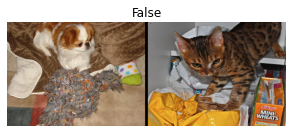

In [ ]:
im0 = PILImage.create(files[0])
im1 = PILImage.create(files[1])
s = SiameseImage(im0,im1,False)
s.show();

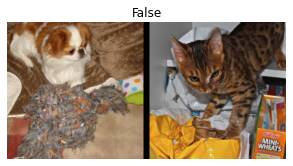

In [ ]:
tst = Resize(228)(s)
tst = ToTensor()(tst)
tst.show();

Now let's rewrite the `SiameseTransform` so that `encodes` returns a `SiameseImage`. We'll also make it compliant with some fastai best practices, e.g., determining train and valid by passing in a function that returns two lists of indexes.

In [ ]:
class SiameseTransform(Transform):
    def __init__(self, files, splits):
        self.valid = {f: self._get_f2(f) for f in files[splits[1]]} # store map of im1:im2 for files in valid split
        
    def encodes(self, f):
        f2, same = self.valid.get(f, self._get_f2(f)) # if f in valid, return valid['f']; else create new f2
        im1, im2 = PILImage.create(f), PILImage.create(f2)
        return SiameseImage(im1, im2, same)
        
    def _get_f2(self, f):
        cls = label_func(f)
        same = random.random() < 0.5 # flip a coin: if True, file2 will be of same class as file1
        if not same: cls = random.choice([l for l in labels if l != cls]) # if not same, choose new cls
        return random.choice(lbl2files[cls]),same

In [ ]:
splits = RandomSplitter()(files)
tfm = SiameseTransform(files, splits)

In [ ]:
tls = TfmdLists(files, tfm, splits=splits)

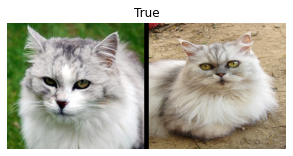

In [ ]:
show_at(tls.valid, 1);

In [ ]:
dls = tls.dataloaders(after_item=[Resize(224), ToTensor],
                      after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats)])

When calling show_batch on dls, fastai will send the batch to the type-dispatched function for showing batches of type SiameseImage. Let's make that method now!

## Making `show_batch()` work by utilizing SiameseImage
> `show_batch()`

In [ ]:
@typedispatch
def show_batch(x:SiameseImage, y, samples, ctxs=None, max_n=6, nrows=None, ncols=2, figsize=None, **kwargs):
    if figsize is None: figsize = (ncols*6, max_n//ncols * 3)
    if ctxs is None: ctxs = get_grid(min(x[0].shape[0], max_n), nrows=None, ncols=ncols, figsize=figsize)
    for i,ctx in enumerate(ctxs):
        SiameseImage(x[0][i], x[1][i], ['Not similar','Similar'][x[2][i].item()]).show(ctx=ctx)

In [ ]:
b = dls.one_batch()

In [ ]:
dls._types

{__main__.SiameseImage: [fastai.torch_core.TensorImage,
  fastai.torch_core.TensorImage,
  torch.Tensor]}

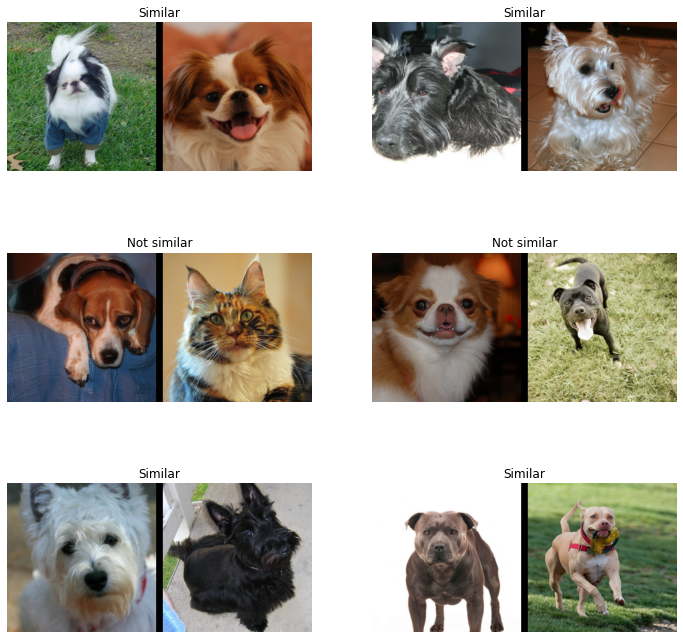

In [ ]:
dls.show_batch()

##  Detour: creating a `DataBlock` for transform code reuse on any tuple of ims
> `ImageTuple`, `ImageTupleBlock`, `get_f2()` aka draw(), `get_items()`, `get_x()`, `get_y()`, `siam_db`, `show_batch()` for ImageTuples

Let's make a datablock to consistently handle all transformations the semantic type described as "a tuple of ims". First, a new class for ImageTuple based on fastuple.

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)
files = get_image_files(path/"images")

In [ ]:
import re
def label_func(fname): return re.match(r'^(.*)_\d+.jpg$', fname.name).groups()[0]
labels = L(set(files.map(label_func)))
lbl2files = {l: [f for f in files if label_func(f) == l] for l in labels}

In [ ]:
class ImageTuple(fastuple):
    @classmethod
    def create(cls, fns): return cls(tuple(PILImage.create(f) for f in fns))
    
    def show(self, ctx=None, **kwargs):
        t1, t2 = self
        if not isinstance(t1, Tensor) or not isinstance(t2, Tensor) or t1.shape != t2.shape: return ctx
        padding = t1.new_zeros(t1.shape[0], t1.shape[1], 10)
        return show_image(torch.cat([t1,padding,t2], dim=2), ctx=ctx, **kwargs)

Since this is a subclass of fastuple, any Transforms will be applied over each part of the tuple.

In [ ]:
im = ImageTuple.create((files[0], files[1]))
im

(PILImage mode=RGB size=500x375, PILImage mode=RGB size=500x463)

In [ ]:
tst = ToTensor()(im)
tst

(TensorImage([[[102,  87, 114,  ..., 113,  99,  86],
          [112,  83, 102,  ...,  81,  73,  78],
          [120,  90,  94,  ...,  87,  94,  96],
          ...,
          [ 72,  73,  63,  ..., 164, 163, 163],
          [ 76,  62,  56,  ..., 166, 165, 164],
          [ 55,  55,  57,  ..., 168, 165, 164]],
 
         [[ 73,  60,  88,  ...,  81,  69,  56],
          [ 82,  56,  76,  ...,  51,  46,  51],
          [ 90,  62,  68,  ...,  59,  68,  70],
          ...,
          [ 74,  76,  66,  ..., 131, 130, 130],
          [ 78,  64,  59,  ..., 131, 130, 129],
          [ 57,  57,  59,  ..., 133, 130, 129]],
 
         [[ 43,  31,  61,  ...,  56,  43,  28],
          [ 54,  29,  51,  ...,  25,  19,  24],
          [ 64,  38,  43,  ...,  35,  43,  43],
          ...,
          [ 69,  69,  59,  ..., 100,  99,  99],
          [ 73,  59,  52,  ..., 101, 100,  99],
          [ 52,  52,  54,  ..., 103, 100,  99]]], dtype=torch.uint8),
 TensorImage([[[134, 134, 132,  ..., 163, 165, 165],
     

We can now define a block associated to ImageTuple that we can use in the data block API. A block is basically a set of default transforms.

In [ ]:
def ImageTupleBlock(): return TransformBlock(type_tfms=ImageTuple.create, batch_tfms=IntToFloatTensor)

We will now create a few functions for use in the DataBlock instantiation, just like the ones we had before.

In [ ]:
def get_f2(f):
    same = random.random() < 0.5
    cls = label_func(f)
    if not same: cls = random.choice(L(l for l in labels if l != cls)) 
    return random.choice(lbl2files[cls]),same

def get_tuples(path):
    fns = get_image_files(path)
    return [[f, *get_f2(f)] for f in fns]

def get_x(t): return t[:2]
def get_y(t): return t[2]

In [ ]:
siam_db = DataBlock(
    blocks=(ImageTupleBlock, CategoryBlock),
    get_items=get_tuples,
    get_x=get_x, get_y=get_y,
    splitter=RandomSplitter(),
    item_tfms=Resize(224),
    batch_tfms=[Normalize.from_stats(*imagenet_stats)]
)

In [ ]:
dls = siam_db.dataloaders(path/"images", path=path)

b = dls.one_batch()
explode_types(b)

{tuple: [{__main__.ImageTuple: [fastai.torch_core.TensorImage,
    fastai.torch_core.TensorImage]},
  fastai.torch_core.TensorCategory]}

Now we need a new show_batch (the last one handled SiameseImages; this one will handle ImageTuples).

In [ ]:
show_batch??

In [ ]:
@typedispatch
def show_batch(x:ImageTuple, y, samples, ctxs=None, max_n=6, nrows=None, ncols=2, figsize=None, **kwargs):
    if figsize is None: figsize = (ncols*6, max_n//ncols*3)
    if ctxs is None: ctxs = get_grid(min(len(samples), max_n), nrows=nrows, ncols=ncols, figsize=figsize)
    ctxs = show_batch[object](x, y, samples, ctxs=ctxs, max_n=max_n, **kwargs)
    return ctxs

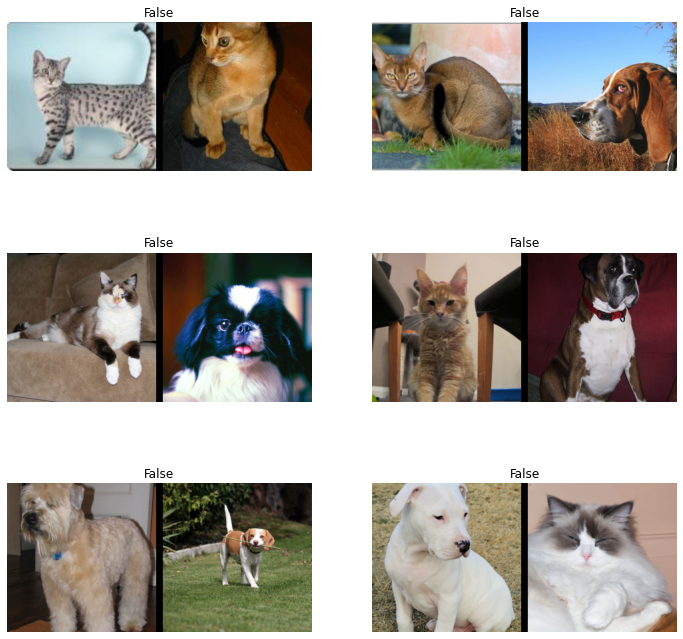

In [ ]:
b = dls.one_batch()
dls.show_batch()

## Building the model with data from mid-level api (Transforms & TfmdLists)
> `SiameseModel`, `encoder`, `head`, `siamese_splitter()`, `explode_types(b)`

We are now at the stage where we can train a model on this data. We will use a very simple approach: take the body of a pretrained model and make the two images pass through it. Then build a head the usual way, with just twice as many features.

In [ ]:
class SiameseModel(Module):
    def __init__(self, encoder, head):
        self.encoder, self.head = encoder, head
        
    def forward(self, x1, x2):
        ftrs = torch.cat([self.encoder(x1), self.encoder(x2)], dim=1)
        return self.head(ftrs)

For our encoder, we'll use the fastai fxn create_body. It takes an arch and an index where to cut it.

In [ ]:
model_meta[resnet34]

{'cut': -2,
 'split': <function fastai.vision.learner._resnet_split(m)>,
 'stats': ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])}

In [ ]:
encoder = create_body(resnet34)

Now we need to add on the proper head, and to make sure it's outputting the right number of activations. Let's look at the last block of the pre-cut encoder:

In [ ]:
encoder[-1]

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): Sequential(
      (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): BasicBlock(
    (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1

Notice:

`...
(conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)`

It ends up with 512 activations, so for our custom head, we will need to multiply this by 4 (2\*2): 2 b/c we have two ims concat'ed, and 2 b/c of the fastai concat-pool trick. We also need to define the number of outputs now, and in our case it's 2 (binary cross entropy).

In [ ]:
head = create_head(512*2*2, 2, ps=0.5)

In [ ]:
head

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=2048, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=2, bias=False)
)

In [ ]:
model = SiameseModel(encoder, head)

Almost there! Since we're using transfer learning, we now need to tell the model which params are pre-trained. A splitter is a function that takes a model and returns lists of params. The params function returns all the params of a model.

In [ ]:
def siamese_splitter(model):
    return [params(model.encoder), params(model.head)]

The usual CEL, but converts bools to ints:

In [ ]:
def loss_func(out, targ):
    return CrossEntropyLossFlat()(out, targ.long())

The model & loss func are created. Let's use the midlevel transforms api to get the data.

In [ ]:
class SiameseImage(fastuple):
    def show(self, ctx=None, **kwargs):
        # unpack tuple
        if len(self) > 2:
            im1, im2, similarity = self
        else:
            im1, im2 = self
            similarity = 'Undetermined'
        # ensure ims are tensors
        if not isinstance(im1, Tensor):
            if im2.size != im1.size: im2 = im2.resize(im1.size)
            t1, t2 = tensor(im1), tensor(im2)
            t1, t2 = t1.permute(2,0,1), t2.permute(2,0,1)
        else: t1, t2 = im1, im2
        # create padding
        padding = t1.new_zeros(t1.shape[0], t1.shape[1], 10)
        # concat t1,padding,t2 into a single tensor and return
        return show_image(torch.cat([t1, padding, t2], dim=2), title=similarity, ctx=ctx, **kwargs)

In [ ]:
class SiameseTransform(Transform):
    def __init__(self, files, splits):
        self.valid = {f: self._draw(f) for f in files[splits[1]]}
        
    def encodes(self, f):
        f2,t = self.valid.get(f, self._draw(f))
        img1,img2 = PILImage.create(f),PILImage.create(f2)
        return SiameseImage(img1, img2, int(t))
    
    def _draw(self, f):
        same = random.random() < 0.5
        cls = label_func(f)
        if not same: cls = random.choice(L(l for l in labels if l != cls)) 
        return random.choice(lbl2files[cls]),same
    
splits = RandomSplitter()(files)
tfm = SiameseTransform(files, splits)
tls = TfmdLists(files, tfm, splits=splits)
dls = tls.dataloaders(after_item=[Resize(224), ToTensor], 
                      after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats)])

In [ ]:
b = dls.one_batch()
explode_types(b)

{__main__.SiameseImage: [fastai.torch_core.TensorImage,
  fastai.torch_core.TensorImage,
  torch.Tensor]}

## Training the model
> `Learner()` & methods `learner.freeze() .lr_find() .fit_one_cycle() .unfreeze()`

In [ ]:
learner = Learner(dls, model, loss_func=CrossEntropyLossFlat(), splitter=siamese_splitter, metrics=accuracy)

In [ ]:
learner.freeze()

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=0.0030199517495930195)

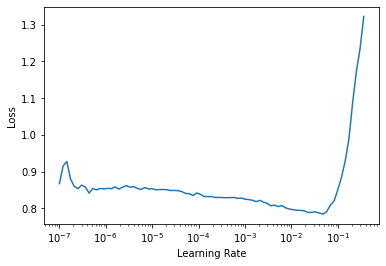

In [ ]:
learner.lr_find()

In [ ]:
learner.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.539756,0.338387,0.851150,00:19
1,0.358716,0.253246,0.903924,00:19
2,0.288792,0.205151,0.922869,00:19
3,0.247742,0.178437,0.929635,00:19


In [ ]:
learner.unfreeze()

In [ ]:
learner.fit_one_cycle(4, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.238522,0.178788,0.933694,00:25
1,0.238441,0.170241,0.936401,00:25
2,0.224789,0.168018,0.935047,00:25
3,0.223779,0.168612,0.937754,00:26


## Modifying `show_results()` and `siam_predict()` to use SiameseImage's show
> `show_results()`, `siam_predict()`

In [ ]:
@typedispatch
def show_results(x:SiameseImage, y, samples, outs, ctxs=None, max_n=6, nrows=None, ncols=2, figsize=None, **kwargs):
    if figsize is None: figsize = (ncols*6, max_n//ncols * 3)
    if ctxs is None: ctxs = get_grid(min(x[0].shape[0], max_n), nrows=None, ncols=ncols, figsize=figsize)
    for i,ctx in enumerate(ctxs): 
        title = (f'Actual: {["Not similar","Similar"][x[2][i].item()]}\n'
             f'Prediction: {["Not similar","Similar"][y[2][i].item()]}')
        SiameseImage(x[0][i], x[1][i], title).show(ctx=ctx)

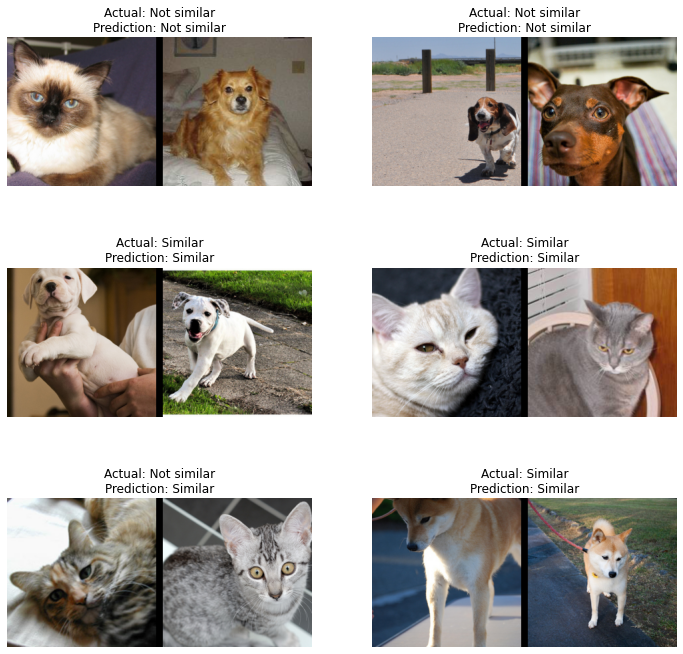

In [ ]:
learner.show_results()

## Showing predictions

In [ ]:
@patch
def siampredict(self:Learner, item, rm_type_tfms=None, with_input=False):
    res = self.predict(item, rm_type_tfms=None, with_input=False)
    if res[0] == tensor(0):
        SiameseImage(item[0], item[1], 'Prediction: Not similar').show()
    else:
        SiameseImage(item[0], item[1], 'Prediction: Similar').show()
    return res

In [ ]:
imtest = PILImage.create(files[0])

In [ ]:
imval = PILImage.create(files[100])

In [ ]:
siamtest = SiameseImage(imval,imtest)

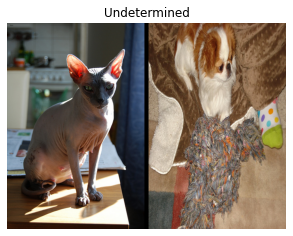

In [ ]:
siamtest.show();

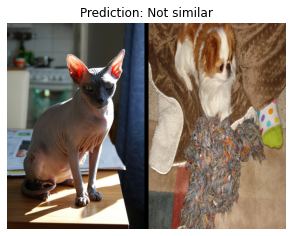

In [ ]:
res = learner.siampredict(siamtest)

# Cleaned up

epoch,train_loss,valid_loss,accuracy,time
0,0.533397,0.372924,0.833559,00:19
1,0.386483,0.280295,0.896482,00:19
2,0.298242,0.209013,0.922192,00:19
3,0.240199,0.204595,0.920839,00:19


epoch,train_loss,valid_loss,accuracy,time
0,0.239473,0.191891,0.927605,00:26
1,0.243189,0.188536,0.926928,00:25
2,0.210373,0.189747,0.925575,00:26
3,0.217235,0.179485,0.933018,00:26


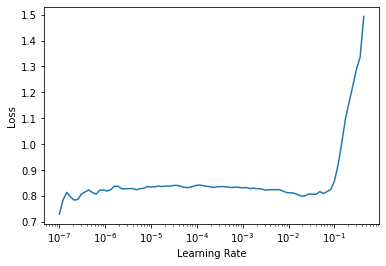

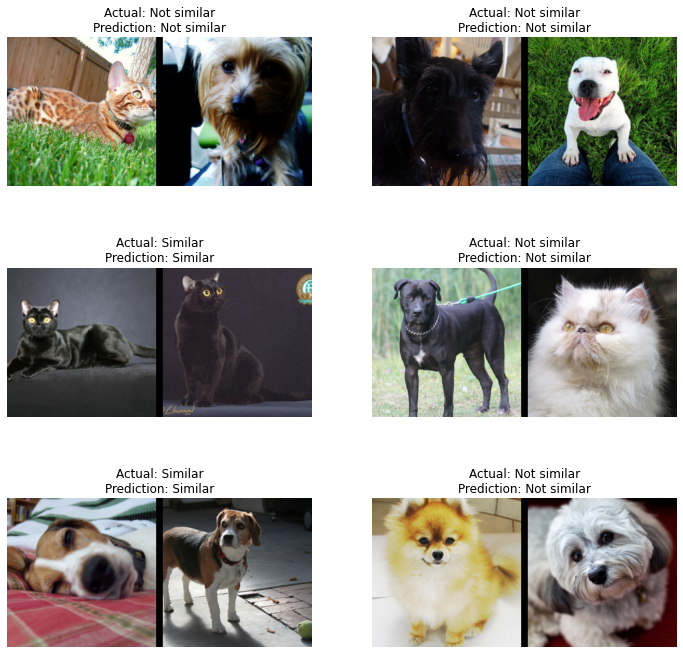

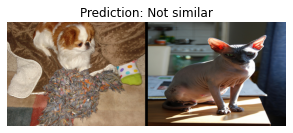

In [ ]:
from fastai.vision.all import *
import re

### Extract raw data ###
path = untar_data(URLs.PETS) # path
files = get_image_files(path/"images") # im files
def label_func(fname): return re.match(r'^(.*)_\d+.jpg$', fname.name).groups()[0] # labels


### Class for showing a SiameseImage ###
class SiameseImage(fastuple):
    
    def show(self, ctx=None, **kwargs):
        if len(self) > 2: im1, im2, similarity = self            # unpack tuple
        else: im1, im2 = self; similarity = 'Undetermined'
            
        if not isinstance(im1, Tensor):                          # ensure ims are tensors
            if im2.size != im1.size: im2 = im2.resize(im1.size)
            t1, t2 = tensor(im1), tensor(im2)
            t1, t2 = t1.permute(2,0,1), t2.permute(2,0,1)
        else: t1, t2 = im1, im2
            
        padding = t1.new_zeros(t1.shape[0], t1.shape[1], 10)     # create padding
        
        return show_image(torch.cat([t1, padding, t2], dim=2),   # show concatenated ims
                          title=similarity, ctx=ctx, **kwargs)

    
### Transform; encodes an image file into a SiameseImage ###
class SiameseTransform(Transform):
    
    def __init__(self, files, splits):
        self.valid = {f: self._draw(f) for f in files[splits[1]]}
        
    def encodes(self, f):
        f2,t = self.valid.get(f, self._draw(f))             # dict.get(item, item to return if arg1 DNE)
        img1,img2 = PILImage.create(f),PILImage.create(f2)
        return SiameseImage(img1, img2, int(t))
    
    def _draw(self, f):
        same = random.random() < 0.5
        cls = label_func(f)
        if not same: cls = random.choice(L(l for l in labels if l != cls)) 
        return random.choice(lbl2files[cls]),same

    
### Dataloaders via TfmdLists ###
splits = RandomSplitter()(files)                          # train/valid splits
tfm = SiameseTransform(files, splits)                     # instantiate the transform with files and splits
tls = TfmdLists(files, tfm, splits=splits)                # transform (lazily) the files into SiameseImages
dls = tls.dataloaders(after_item=[Resize(224), ToTensor], # create the dataloader
                      after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats)])


### Define model & instantiate; forward takes tuple ###
class SiameseModel(Module):
    
    def __init__(self, encoder, head):
        self.encoder, self.head = encoder, head
        
    def forward(self, x1, x2):
        ftrs = torch.cat([self.encoder(x1), self.encoder(x2)], dim=1)
        return self.head(ftrs)

encoder = create_body(resnet34)
head = create_head(512*2*2, 2, ps=0.5)
model = SiameseModel(encoder, head)


### Instantiate learner, find_lr, train frozen, train unfrozen ###
def siamese_splitter(model):
    return [params(model.encoder), params(model.head)]

learner = Learner(dls, model, loss_func=CrossEntropyLossFlat(),
                  splitter=siamese_splitter, metrics=accuracy)
learner.freeze() # must freeze by hand b/c learner wasn't created with a helper method
learner.lr_find()
learner.fit_one_cycle(4, 3e-3)
learner.unfreeze()
learner.fit_one_cycle(4, slice(1e-6,1e-4))


### Show results ###
@typedispatch
def show_results(x:SiameseImage, y, samples, outs, ctxs=None, max_n=6,
                 nrows=None, ncols=2, figsize=None, **kwargs):
    if figsize is None: figsize = (ncols*6, max_n//ncols * 3)
    if ctxs is None: ctxs = get_grid(min(x[0].shape[0], max_n),
                                     nrows=None, ncols=ncols, figsize=figsize)
    for i,ctx in enumerate(ctxs): 
        title = (f'Actual: {["Not similar","Similar"][x[2][i].item()]}\n'
             f'Prediction: {["Not similar","Similar"][y[2][i].item()]}')
        SiameseImage(x[0][i], x[1][i], title).show(ctx=ctx)

learner.show_results()


### Show predictions ###
@patch
def siampredict(self:Learner, item, rm_type_tfms=None, with_input=False):
    res = self.predict(item, rm_type_tfms=None, with_input=False)
    if res[0] == tensor(0):
        SiameseImage(item[0], item[1], 'Prediction: Not similar').show()
    else:
        SiameseImage(item[0], item[1], 'Prediction: Similar').show()
    return res

test_siam_im = SiameseImage(PILImage.create(files[0]),PILImage.create(files[100]))
pred = learner.siampredict(test_siam_im)